# How To Compute Drawdown On An Investment

Drawdown is the maximum decline from peak to trough during a specific period before a new peak is reached. Every [trading](https://pyquantnews.com/trading/) strategy experiences drawdowns. Computing it helps you compare the relative riskiness between assets or strategies.

Unfortunately, most people don’t consider drawdown when managing their investments. Or if they do, struggle to compute it.

## Step 1: Get The Data

I start by importing the libraries I need.

In [1]:
import yfinance as yf
import numpy as np

Then I get data and compute the simple returns.


In [2]:
data = yf.download("SPY", start="2020-01-01", end="2022-07-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
returns = data["Adj Close"].pct_change()

I use yfinance to get stock data – in this case, SPY. Drawdown is usually computed with the returns of a portfolio. I want to keep it simple so I use the S&P500 ETF.

## Step 2: Create The Drawdown Function

Drawdown is computed with 4 lines of code.

When computing returns, the first value is turned into <i>np.nan</i>. I replace it with a 0.0 to compute cumulative returns. Then I create a cumulative return series which is the cumulative product of 1 plus the return. Next, I use NumPy’s <i>accumulate</i> function. Accumulate tracks the running maximum value which is perfect for keeping tabs on the peak return.

Finally, I compute the percentage difference between the cumulative and peak returns.

Here’s the code:

In [4]:
def drawdown(returns):
    """Determines the drawdown
    
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    drawdown : pd.Series
    
    """

    # replace the first nan value with 0.0
    returns.fillna(0.0, inplace=True)

    # create cumulative returns
    cumulative = (returns + 1).cumprod()

    # np.maximum.accumulate takes the running max value
    # of the input series. in this case, it will maintain
    # the running maximum value. this is the running
    # maximum return
    running_max = np.maximum.accumulate(cumulative)

    # compute the change between the cumulative return
    # and the running maximum return
    return (cumulative - running_max) / running_max

And the plot.

<AxesSubplot:xlabel='Date'>

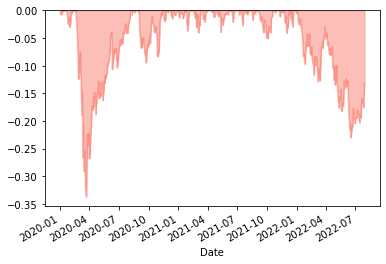

In [5]:
drawdown(returns).plot(kind="area", color="salmon", alpha=0.5)

This chart shows SPY dropping 33.7% from its peak to trough return in 2020.



## Step 3: Create A Max Drawdown Function


Next, I use the <i>drawdown</i> to compute a max drawdown chart.

The max drawdown differs from the drawdown by tracking the maximum drawdown of a 30-day rolling window of returns. To use rolling statistics, check out [this issue](https://preview.convertkit-mail2.com/click/dpheh0hzhm/aHR0cHM6Ly9weXF1YW50bmV3cy5jb20vcHFuLTAwNi12aXN1YWxpemUtdGhlLXRyZW5kLXdpdGgtcGFuZGFzLXJvbGxpbmcv) of The PyQuant Newsletter.

Here’s the code.

In [6]:
def max_drawdown(returns):
    """ Determines the maximum drawdown
    
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    max_drawdown : float
    
    """

    return np.min(drawdown(returns))

<i>max_drawdown</i> applies the <i>drawdown</i> function to 30 days of returns and figures out the smallest (most negative) value that occurs over those 30 days. Then it moves forward one day, computes it again, until the end of the series.

In [7]:
max_drawdown(returns)

-0.3371726664821896

Here’s the plot.


<AxesSubplot:xlabel='Date'>

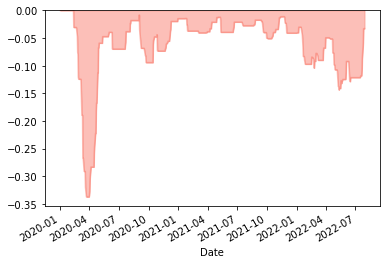

In [8]:
returns.rolling(30).apply(max_drawdown).plot(kind="area", color="salmon", alpha=0.5)

Drawdown and max drawdown focus on capital preservation. It’s a useful indicator of the riskiness of a stock, portfolio, or strategy. Use it to help manage your risk.